# U.S. Medical Insurance Costs

In [2]:
# import pandas library
import pandas as pd


**insurance.csv** contains the following columns:
* Patient Age
* Patient Sex 
* Patient BMI
* Patient Number of Children
* Patient Smoking Status
* Patient U.S Geopraphical Region
* Patient Yearly Medical Insurance Cost

In [5]:
# Read your data
data = pd.read_csv('insurance.csv')
data.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#Create lists for the various attributes in insurance.csv
ages = data['age'].values
sexes = data['sex'].values
bmis = data['bmi'].values
num_children = data['children'].values
smoker_statuses = data['smoker'].values
regions = data['region'].values
insurance_charges = data['charges'].values

In order to start the analysis of the data neatly organized from insurance.csv, it's essential to plan what aspects to investigate and how to perform the analysis. There are several aspects of the data that can be explored, and the following operations will be conducted:

* Calculate the average age of the patients.
* Determine the gender distribution by counting the number of males and females in the dataset.
* Identify the geographical locations of the patients.
* Calculate the average yearly medical charges incurred by the patients.
* Create a comprehensive dictionary containing all patient information.

To facilitate these investigations, a class named PatientsInfo has been developed, which includes five methods:

* analyze_ages()
* analyze_sexes()
* unique_regions()
* average_charges()
* create_dictionary()

The class is implemented below:

In [22]:
class PatientsInfo:
    def __init__(self, patients_ages, patients_sexes, patients_bmis, patients_num_children, 
                 patients_smoker_statuses, patients_regions, patients_charges):
        # Initialize instance variables with the provided data.
        self.patients_ages = [int(age) for age in patients_ages]
        self.patients_sexes = patients_sexes
        self.patients_bmis = patients_bmis
        self.patients_num_children = patients_num_children
        self.patients_smoker_statuses = patients_smoker_statuses
        self.patients_regions = patients_regions
        self.patients_charges = [float(charge) for charge in patients_charges]

    def analyze_ages(self):
        # Calculate and return the average age of patients.
        average_age = round(sum(self.patients_ages) / len(self.patients_ages), 2)
        return (f"Average Patient Age: {average_age} years")

    def analyze_sexes(self):
        # Count and print the number of females and males in the dataset.
        females = 0
        males = 0
        # iterate through each sex in the sexes list
        for sex in self.patients_sexes:
            # if female add to female variable
            if sex == 'female':
                females += 1
            # if male add to male variable
            elif sex == 'male':
                males += 1
        print(f"Count for female: {females}")
        print(f"Count for male: {males}")

    def unique_regions(self):
        # Find and return a list of unique regions from the dataset.
        return list(set(self.patients_regions))

    def average_charges(self):
        # Calculate and return the average yearly medical insurance charges for patients.
        average_charges = round(sum(self.patients_charges) / len(self.patients_charges), 2)
        return (f"Average Yearly Medical Insurance Charges: {average_charges} dollars.")

    def create_dictionary(self):
        # Create and return a dictionary containing all patient information.
        patients_dictionary = {
            "age": self.patients_ages,
            "sex": self.patients_sexes,
            "bmi": self.patients_bmis,
            "children": self.patients_num_children,
            "smoker": self.patients_smoker_statuses,
            "regions": self.patients_regions,
            "charges": self.patients_charges
        }
        return patients_dictionary


In [23]:
# Creating an instance of the class called patient info.
patient_info = PatientsInfo(ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges)


In [26]:
# Performing analysis

patient_info.analyze_ages()



'Average Patient Age: 39.21 years'

In [27]:
patient_info.analyze_sexes()

Count for female: 662
Count for male: 676


In [28]:
patient_info.unique_regions()

['northwest', 'southeast', 'northeast', 'southwest']

In [29]:
patient_info.average_charges()

'Average Yearly Medical Insurance Charges: 13270.42 dollars.'

In [34]:
# Assign the dictionary to patient_data for further analysis
patient_data = patient_info.create_dictionary()


Further Analysis using multiple regression to predict insurance charges for future patients

In [51]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [116]:
# Read your data
data = pd.read_csv('insurance.csv')
data.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [130]:
# Trasnform all data into numerical values
# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Scale numerical variables (age, bmi, and children)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded[['age', 'bmi', 'children',]] = scaler.fit_transform(data[['age', 'bmi', 'children']])

In [131]:
patient_data = sm.add_constant(data_encoded)
patient_data = data_encoded[['age', 'bmi', 'children', 'sex_male', 'smoker_yes' ]]
print(patient_data)

,age,bmi,children,sex_male,smoker_yes
0,-1.438764,-0.453320,-0.908614,0,1
1,-1.509965,0.509621,-0.078767,1,0
2,-0.797954,0.383307,1.580926,1,0
3,-0.441948,-1.305531,-0.908614,1,0
4,-0.513149,-0.292556,-0.908614,1,0
...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,1,0
1334,-1.509965,0.206139,-0.908614,0,0
1335,-1.509965,1.014878,-0.908614,0,0
1336,-1.296362,-0.797813,-0.908614,0,0


In [134]:
X = patient_data
y = data_encoded['charges']/1000


0       16.884924
1        1.725552
2        4.449462
3       21.984471
4        3.866855
          ...    
1333    10.600548
1334     2.205981
1335     1.629833
1336     2.007945
1337    29.141360
Name: charges, Length: 1338, dtype: float64

In [135]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = round(mean_squared_error(y_test, y_pred), 2)
r2 = round(r2_score(y_test, y_pred), 2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print the coefficients of the model
coefficients = [round(coef, 2) for coef in model.coef_]
intercept = round(model.intercept_, 2)

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Mean Squared Error: 33.98
R-squared: 0.78
Coefficients: [3.61, 2.0, 0.51, -0.01, 23.65]
Intercept: 8.48


* MSE: 33.98

Mean Squared Error represents the average prediction error for Insurance Costs. Lower values indicate a better model fit.

* R²: 0.78

R-squared measures how well the model explains Insurance Costs variability. Higher values (0 to 1) mean better fit.
Coefficients: [3.61, 2.0, 0.51, -0.01, 23.65]

Coefficients show the impact of variables on Insurance Costs:
* Age (3.61)
* BMI (2.0)
* Children (0.51)
* Sex_male (-0.01)
* Smoker_yes (23.65)
* Intercept: 8.48

Intercept is the estimated Insurance Costs when all variables are zero.

In summary, the model explains 78% of Insurance Costs variance. Key factors include age, BMI, children, gender, and smoking status, with smoking having the largest impact.

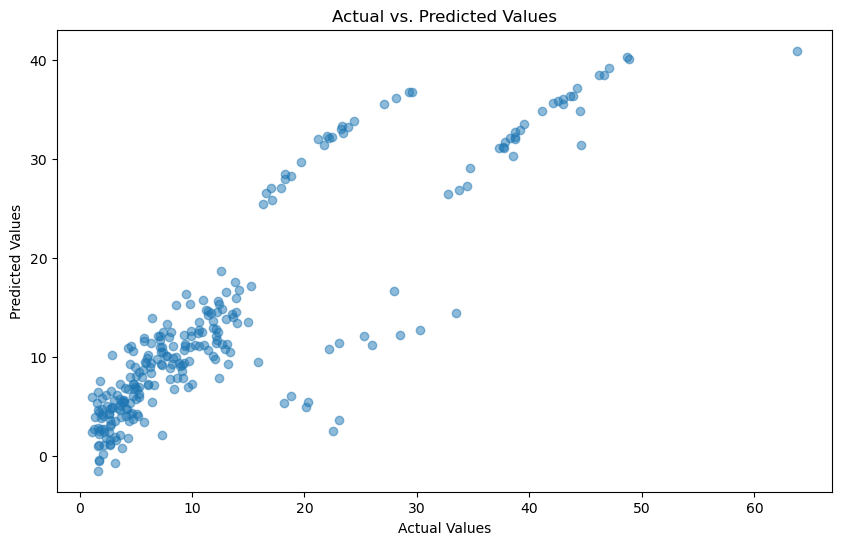

In [136]:
# Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()



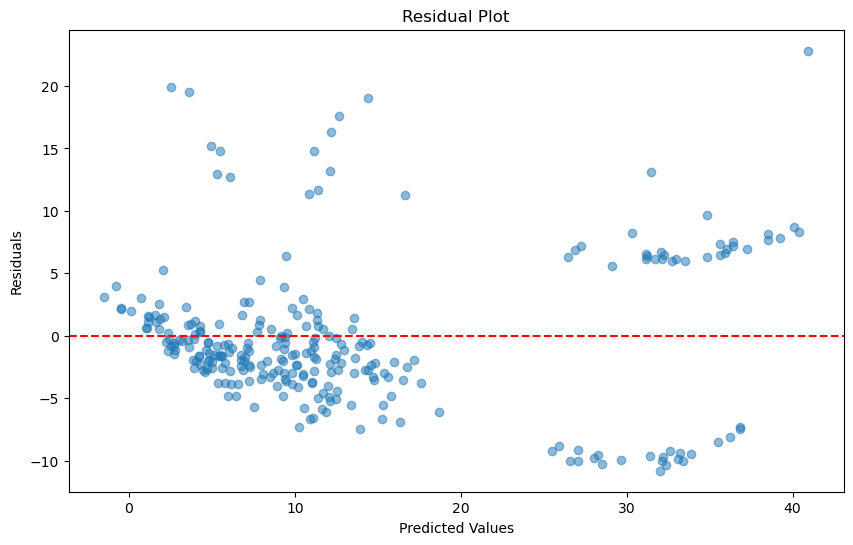

In [138]:
# Residual plot to check for homoscedasticity
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

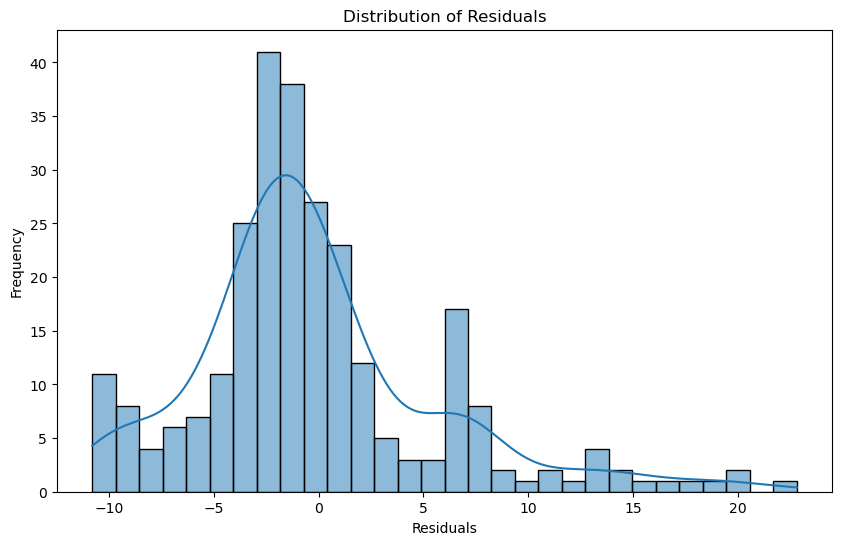

In [139]:
# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


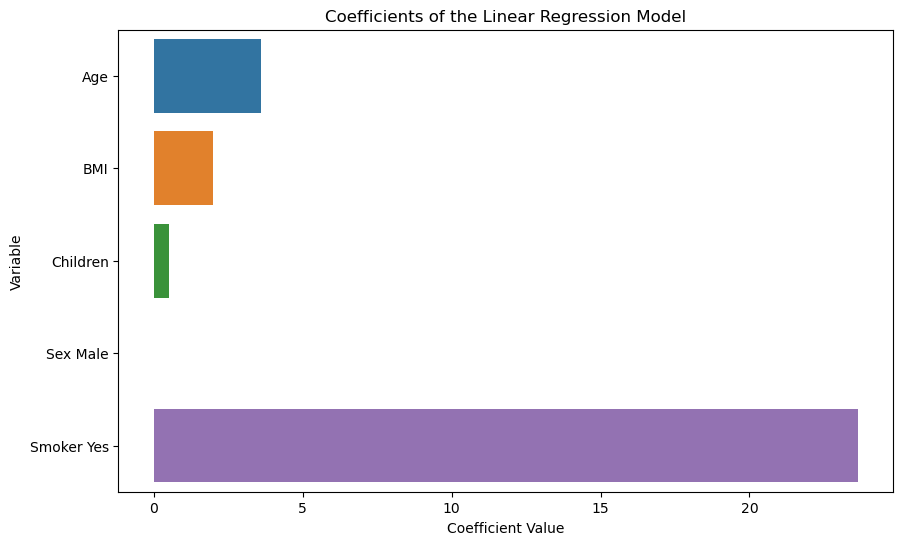

In [140]:
# Coefficient plot
coef_names = ['Age', 'BMI', 'Children', 'Sex Male', 'Smoker Yes']
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=coef_names)
plt.xlabel("Coefficient Value")
plt.ylabel("Variable")
plt.title("Coefficients of the Linear Regression Model")
plt.show()